In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
start_time = time.time()

df_initial = pd.read_excel('Training_Combined_Data_v2.xlsx')
print("--- %s seconds ---" % (time.time() - start_time))

--- 255.3781979084015 seconds ---


In [3]:
# display all rows and columns of the dataframe
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
print("The dataset has {} rows and {} columns".format(*df_initial.shape))

The dataset has 302922 rows and 91 columns


In [5]:
df_raw = df_initial.copy()

In [6]:
df_raw.head()

,Unnamed: 0,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,market,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,0,2020-01-11,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,NaN,"Good transport connection, 150 m from metro â...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Tasa turistica a pagar a la llegada: 2.48 euro...,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,0.98,NaN,f,la Sagrada FamÃ­lia,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",La Sagrada FamÃ­lia,la Sagrada FamÃ­lia,Eixample,Barcelona,8025,Barcelona,"Barcelona, Spain",ES,41.40420,2.17306,t,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",NaN,NaN,NaN,$150.00,$50.00,2,$30.00,1,1125,1,7,1125,1125,3.7,1125.0,today,t,4,22,35,292,2020-01-11,21,16,2013-05-27,2019-11-01,88.0,9.0,10.0,10.0,10.0,10.0,9.0,t,HUTB-002062,t,f,strict_14_with_grace_period,f,f,31,31,0,0,0.26,$60.00
1,1,2020-01-11,Forum DeLuxe 5 mins Walk To CCIB Center & Seaâ˜…,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,Strategically located in the area of Parc del ...,"As a Superhost, I aim to make your stay as com...","Tram T4 Campus Diagonal- Besos, over the ro...",You book the entire apartment for yourselves.,"Please do contact Tony, your check-in manager,...",I do not accept groups of young people under 2...,2010-03-09,"Catalonia, Spain","Hi. I'm Etain, though everyone calls me by my...",within an hour,1.00,NaN,t,El BesÃ²s i el Maresme,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sant Adria de Besos, Barcelona, Spain",Sant MartÃ­,el BesÃ²s i el Maresme,Sant MartÃ­,Sant Adria de Besos,8930,Barcelona,"Sant Adria de Besos, Spain",ES,41.41203,2.22114,f,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",NaN,NaN,NaN,$300.00,$80.00,3,$10.00,3,30,3,4,1125,1125,3.0,1125.0,today,t,30,56,86,351,2020-01-11,52,17,2011-03-15,2019-12-15,95.0,10.0,10.0,10.0,10.0,9.0,9.0,t,HUTB-005057,t,f,strict_14_with_grace_period,f,t,2,2,0,0,0.48,$210.00
2,2,2020-01-11,"Gaudi Attic 1, Friendly Rentals","This apartment has: 1 double bed, 1

## Droping initial columns

In [7]:
cols_to_drop = ['Unnamed: 0',  'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',  'host_location', 'host_about',  'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = df_raw.drop(cols_to_drop, axis=1)

In [8]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,market,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,2010-01-19,within an hour,0.98,NaN,f,47.0,47.0,t,t,"Barcelona, CT, Spain",La Sagrada FamÃ­lia,la Sagrada FamÃ­lia,Eixample,Barcelona,8025,Barcelona,"Barcelona, Spain",ES,41.40420,2.17306,t,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",NaN,NaN,NaN,$150.00,$50.00,2,$30.00,1,1125,1,7,1125,1125,3.7,1125.0,today,t,4,22,35,292,21,16,2013-05-27,2019-11-01,88.0,9.0,10.0,10.0,10.0,10.0,9.0,t,HUTB-002062,t,f,strict_14_with_grace_period,f,f,31,31,0,0,0.26,$60.00
1,2010-03-09,within an hour,1.00,NaN,t,5.0,5.0,t,t,"Sant Adria de Besos, Barcelona, Spain",Sant MartÃ­,el BesÃ²s i el Maresme,Sant MartÃ­,Sant Adria de Besos,8930,Barcelona,"Sant Adria de Besos, Spain",ES,41.41203,2.22114,f,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",NaN,NaN,NaN,$300.00,$80.00,3,$10.00,3,30,3,4,1125,1125,3.0,1125.0,today,t,30,56,86,351,52,17,2011-03-15,2019-12-15,95.0,10.0,10.0,10.0,10.0,9.0,9.0,t,HUTB-005057,t,f,strict_14_with_grace_period,f,t,2,2,0,0,0.48,$210.00
2,2010-06-02,within an hour,0.95,NaN,f,41.0,41.0,t,f,"Barcelona, Barcelona, Spain",Camp d'en Grassot i GrÃ cia Nova,el Camp d'en Grassot i GrÃ cia Nova,GrÃ cia,Barcelona,8024,Barcelona,"Barcelona, Spain",ES,41.40950,2.15938,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",NaN,NaN,NaN,$200.00,$58.00,4,$0.00,1,27,1,3,27,27,2.1,27.0,today,t,11,27,52,318,186,35,2011-02-19,2019-11-17,91.0,9.0,9.0,8.0,9.0,9.0,9.0,t,HUTB-004554,t,f,strict_14_with_grace_period,f,f,41,41,0,0,1.72,$52.00
3,2010-06-02,within an hour,0.95,NaN,f,41.0,41.0,t,f,"Barcelona, Barcelona, Spain",GrÃ cia,el Camp d'en Grassot i GrÃ cia Nova,GrÃ cia,Barcelona,8024,Barcelona,"Barcelona, Spain",ES,41.40928,2.16112,t,Apartment,Entire home/apt,5,1.5,3.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",NaN,NaN,NaN,$200.00,$108.00,5,$0.00,1,27,1,3,27,27,2.0,27.0,today,t,25,45,75,337,91,24,2011-01-07,2019-11-05,88.0,9.0,9.0,9.0,9.0,9.0,9.0,t,HUTB-005373,t,f,strict_14_with_grace_period,f,f,41,41,0,0,0.83,$58.00
4,2010-06-09,within a day,1.00,NaN,f,1.0,1.0,t,f,"Barcelona, CT, Spain",Les Corts,les Corts,Les Corts,Barcelona,8029,Barcelona,"Barcelona, Spain",ES,41.38720,2.14088,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pet...",NaN,$250.00,$790.00,$0.00,$20.00,1,$15.00,29,60,29,29,60,60,29.0,60.0,2 weeks ago,t,4,4,24,83,19,0,2010-08-26,2014-05-12,99.0,10.0,10.0,10.0,10.0,9.0,9.0,t,NaN,f,f,moderate,f,f,1,0,1,0,0.17,$35.00


In [9]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,218583.000000,83934.000000,301557.000000,301557.000000,302922.000000,302922.000000,302922.000000,302725.000000,302564.000000,301443.000000,4500.000000,302922.000000,302922.000000,3.029220e+05,302922.000000,302922.000000,3.029220e+05,3.029220e+05,302922.000000,3.029220e+05,302922.000000,302922.000000,302922.000000,302922.000000,302922.000000,302922.000000,229769.000000,229591.000000,229646.000000,229484.000000,229585.000000,229497.000000,229474.000000,302922.000000,302922.000000,302922.000000,302922.000000,234004.000000
mean,0.929601,0.851657,19.836611,19.836611,45.108505,6.341630,3.640577,1.301914,1.530995,2.337858,552.127111,1.753999,5.411901,4.319798e+04,5.246991,6.280610,1.708209e+05,1.850179e+05,5.684344,1.849420e+05,11.450677,25.202623,40.117565,156.218522,25.556932,9.362285,93.100018,9.561982,9.353479,9.669036,9.681295,9.571284,9.233512,13.995392,12.554965,1.129320,0.073534,1.286065
std,0.180279,0.250725,75.676006,75.676006,4.769688,7.336515,2.358938,0.716020,1.101719,1.977699,2078.850022,1.854468,19.355175,9.557325e+06,18.995131,19.832298,1.911408e+07,1.989450e+07,19.185156,1.988748e+07,11.913354,24.076453,36.239662,139.600941,52.260111,16.893319,8.982916,0.891607,1.037592,0.804695,0.798099,0.763715,0.992409,44.783568,43.728173,4.515302,1.147313,1.597709
min,0.000000,0.000000,0.000000,0.000000,40.767480,-8.783350,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.970000,0.810000,1.000000,1.000000,41.380140,2.173400,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,3.000000e+01,3.000000e+01,1.300000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,1.000000,0.990000,2.000000,2.000000,41.988230,3.208430,3.000000,1.000000,1.000000,2.000000,323.000000,1.000000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,8.000000,22.000000,39.000000,139.000000,5.000000,2.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.650000
75%,1.000000,1.000000,6.000000,6.000000,52.379400,13.392270,4.000000,1.500000,2.000000,3.000000,753.000000,2.000000,3.000000,1.125000e+03,3.000000,5.000000,1.125000e+03,1.125000e+03,3.900000,1.125000e+03,24.000000,51.000000,78.000000,303.000000,24.000000,11.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,3.000000,1.000000,0.000000,1.810000
max,1.000000,1.000000,1623.000000,1623.000000,52.656630,14.348130,125.000000,24.000000,34.000000,50.000000,75347.000000,200.000000,1124.000000,2.147484e+09,1124.000000,1124.000000,2.147484e+09,2.147484e+09,1124.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,880.000000,872.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,493.000000,478.000000,97.000000,43.000000,58.150000


## price
Price will be converted to an integer. Currently it is a string because there is a currency sign.

In [10]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

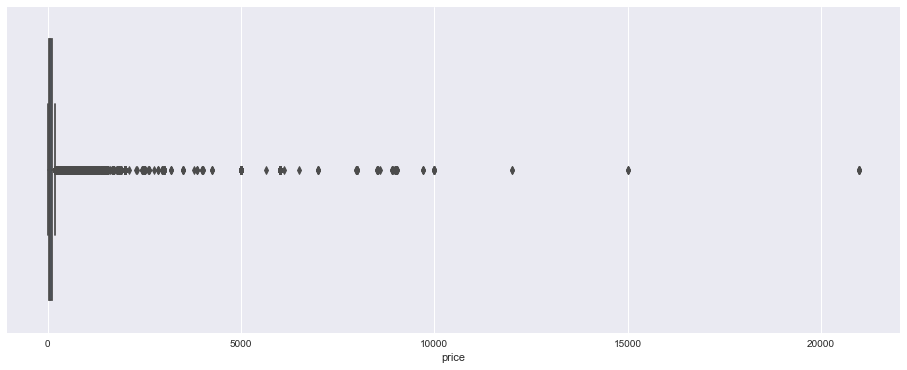

In [11]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df.price)

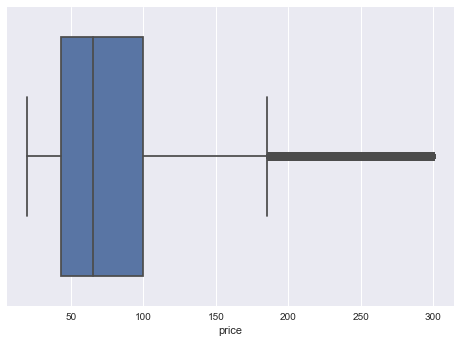

In [12]:
ax = sns.boxplot(df.price[(df.price >= 20) & (df.price <= 300)])

## Based on the boxplot lets limit the price range

In [13]:
df.price = df.price[(df.price >= 20) & (df.price <= 300)]

In [14]:
df.price.isnull().sum()

17785

filling all the missing values with median

In [15]:
df.price.fillna(df.price.median(), inplace=True)

sum null values for each column

In [16]:
df.isna().sum()

host_since                                        1365
host_response_time                               84339
host_response_rate                               84339
host_acceptance_rate                            218988
host_is_superhost                                 1365
host_listings_count                               1365
host_total_listings_count                         1365
host_has_profile_pic                              1365
host_identity_verified                            1365
street                                               0
neighbourhood                                   131146
neighbourhood_cleansed                               0
neighbourhood_group_cleansed                    129057
city                                               483
zipcode                                           6678
market                                             333
smart_location                                       0
country_code                                         0
latitude  

based on count of null values, revmoving columns with high Nan values
<br/>one more column sinalr to neighbourhood_group_cleansed is neighbourhood

In [17]:
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license'], \
        axis=1, inplace=True)

host_listings_count and host_total_listings_count have similar count of 1365 missing values. Therefore we will find them higly coorelated, so we can remove one of the column

In [19]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

1365


,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
1014,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Barcelona, Catalonia, Spain",El Born,"Sant Pere, Santa Caterina i la Ribera",Barcelona,8003,Barcelona,"Barcelona, Spain",ES,41.38928,2.18194,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Dog...",$100.00,$15.00,3,$20.00,30,60,30,30,60,60,30.0,60.0,53 months ago,t,28,58,88,363,18,0,2013-07-12,2014-09-12,93.0,9.0,9.0,10.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.23,57.0
2271,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Barcelona, Catalonia, Spain",Montbau,Montbau,Barcelona,8035,Barcelona,"Barcelona, Spain",ES,41.43371,2.14252,t,Apartment,Private room,2,1.5,1.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",""...",$0.00,$10.00,1,$10.00,2,30,2,2,30,30,2.0,30.0,a week ago,t,0,0,0,0,217,47,2014-09-01,2020-01-03,89.0,9.0,9.0,10.0,9.0,9.0,9.0,t,t,f,moderate,f,f,3,0,3,0,3.32,25.0
2512,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Barcelona, Catalunya, Spain",Sants-MontjuÃ¯c,Sants,Barcelona,8014,Barcelona,"Barcelona, Spain",ES,41.37591,2.13936,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",NaN,NaN,1,$0.00,1,5,1,1,5,5,1.0,5.0,yesterday,t,0,0,0,0,324,99,2015-01-20,2019-12-24,92.0,10.0,8.0,10.0,10.0,10.0,9.0,t,f,f,flexible,f,f,1,0,1,0,5.35,38.0
3272,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Barcelona, Catalunya, Spain",Sant Gervasi - Galvany,Sant Gervasi - Galvany,Barcelona,8021,Barcelona,"Barcelona, Spain",ES,41.39913,2.13559,f,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Elevator,""Buzzer/w...",NaN,NaN,1,$0.00,1,2,1,1,2,2,1.0,2.0,53 months ago,t,28,58,88,88,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,1,0,1,0,NaN,35.0
3484,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Barcelona, Barcelona, Spain",Eixample,la Sagrada FamÃ­lia,Barcelona,8025,Barcelona,"Barcelona, Spain",ES,41.40531,2.17339,f,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Shampoo}",NaN,NaN,1,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,54 months ago,t,0,0,0,0,1,0,2015-08-05,2015-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,t,1,0,1,0,0.02,50.0


In [21]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

KeyError: "['host_total_listings_count' 'calculated_host_listings_count'\n 'calculated_host_listings_count_entire_homes'\n 'calculated_host_listings_count_private_rooms'\n 'calculated_host_listings_count_shared_rooms'] not found in axis"

removing extra columns related minimum and max nights

In [22]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

23765

In [23]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302922 entries, 0 to 302921
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   host_since                        301557 non-null  datetime64[ns]
 1   host_response_time                218583 non-null  object        
 2   host_response_rate                218583 non-null  float64       
 3   host_is_superhost                 301557 non-null  object        
 4   host_listings_count               301557 non-null  float64       
 5   host_has_profile_pic              301557 non-null  object        
 6   host_identity_verified            301557 non-null  object        
 7   street                            302922 non-null  object        
 8   neighbourhood                     171776 non-null  object        
 9   neighbourhood_cleansed            302922 non-null  object        
 10  city                            

transforming char boolean values into numbers

In [25]:
df[['requires_license', 'instant_bookable', 'is_business_travel_ready']].head()

,requires_license,instant_bookable,is_business_travel_ready
0,t,t,f
1,t,t,f
2,t,t,f
3,t,t,f
4,t,f,f


In [26]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302922 entries, 0 to 302921
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   host_since                        301557 non-null  datetime64[ns]
 1   host_response_time                218583 non-null  object        
 2   host_response_rate                218583 non-null  float64       
 3   host_is_superhost                 301557 non-null  float64       
 4   host_listings_count               301557 non-null  float64       
 5   host_has_profile_pic              301557 non-null  float64       
 6   host_identity_verified            301557 non-null  float64       
 7   street                            302922 non-null  object        
 8   neighbourhood                     171776 non-null  object        
 9   neighbourhood_cleansed            302922 non-null  object        
 10  city                            

In [61]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,zipcode,market,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,price,host_days_active,air_conditioning,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,smoking_allowed
0,2010-01-19,within an hour,90-99%,0.0,47.0,1.0,la Sagrada FamÃ­lia,8025,Barcelona,ES,41.40420,2.17306,Apartment,Entire home/apt,8,2.0,3.0,6.0,$150.00,$50.00,2,$30.00,1,1125,today,4,22,35,292,21,16,2013-05-27,2019-11-01,88.0,9.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,0.26,60.0,3470.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010-03-09,within an hour,100%,1.0,5.0,1.0,el BesÃ²s i el Maresme,8930,Barcelona,ES,41.41203,2.22114,Apartment,Entire home/apt,6,2.0,3.0,5.0,$300.00,$80.00,3,$10.00,3,30,today,30,56,86,351,52,17,2011-03-15,2019-12-15,95.0,10.0,10.0,10.0,10.0,9.0,9.0,1,strict_14_with_grace_period,0.48,210.0,3421.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,8024,Barcelona,ES,41.40950,2.15938,Apartment,Entire home/apt,4,1.0,1.0,1.0,$200.00,$58.00,4,$0.00,1,27,today,11,27,52,318,186,35,2011-02-19,2019-11-17,91.0,9.0,9.0,8.0,9.0,9.0,9.0,1,strict_14_with_grace_period,1.72,52.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,8024,Barcelona,ES,41.40928,2.16112,Apartment,Entire home/apt,5,1.5,3.0,3.0,$200.00,$108.00,5,$0.00,1,27,today,25,45,75,337,91,24,2011-01-07,2019-11-05,88.0,9.0,9.0,9.0,9.0,9.0,9.0,1,strict_14_with_grace_period,0.83,58.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2010-06-09,within a day,100%,0.0,1.0,0.0,les Corts,8029,Barcelona,ES,41.38720,2.14088,Apartment,Private room,1,1.0,1.0,1.0,$0.00,$20.00,1,$15.00,29,60,2 weeks ago,4,4,24,83,19,0,2010-08-26,2014-05-12,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0.17,35.0,3329.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


delete caloumns based on the category or alternate available columns

In [62]:
df.drop([ 'street', 'neighbourhood', 'city', 
          'smart_location',  'is_location_exact'], axis=1, inplace=True)

KeyError: "['street' 'neighbourhood' 'city' 'smart_location' 'is_location_exact'] not found in axis"

categorizing property_type

In [63]:
df.property_type.value_counts()

Apartment    250652
House         35308
Other         15597
Name: property_type, dtype: int64

replacing categories that are types of houses or apartments

In [64]:
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Condominium' : 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [65]:
df.property_type.value_counts()

Apartment    250652
House         35308
Other         15597
Name: property_type, dtype: int64

bathrooms, bedrooms and beds<br/>
Missing values are replaced with the median

In [66]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [67]:
df.drop('bed_type', axis=1, inplace=True)

KeyError: "['bed_type'] not found in axis"

Filling null values of security deposit, cleaning fee, extra_people with median

In [68]:
df[['security_deposit', 'cleaning_fee']].isnull().sum()

security_deposit    88045
cleaning_fee        67471
dtype: int64

In [69]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [71]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [74]:
df.security_deposit.fillna(0, inplace=True)
df.cleaning_fee.fillna(0, inplace=True)

In [75]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [73]:
df.drop('calendar_updated', axis=1, inplace=True)

categorizing cancellation_policy

In [76]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    104942
flexible                        73574
moderate                        73188
moderate_new                    18904
flexible_new                    15158
super_strict_30                  6258
super_strict_60                  4886
strict_new                       4286
super_strict_30_new               250
super_strict_60_new                73
luxury_moderate                    18
strict                             16
luxury_super_strict_95              4
Name: cancellation_policy, dtype: int64

In [77]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'super_strict_30_new': 'strict_14_with_grace_period',
    'super_strict_60_new': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'strict_new': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate',
    'luxury_super_strict_95': 'moderate',
    'moderate_new': 'moderate',
    'flexible_new': 'flexible',
    }, inplace=True)

In [78]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    120711
moderate                        92114
flexible                        88732
Name: cancellation_policy, dtype: int64

number_of_reviews_ltm and reviews_per_month are higly correlated

In [79]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

In [81]:
df.isna().sum()

host_since                         0
host_response_time                 0
host_response_rate                 0
host_is_superhost                  0
host_listings_count                0
host_identity_verified             0
neighbourhood_cleansed             0
zipcode                         6648
market                           333
country_code                       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
security_deposit                   0
cleaning_fee                       0
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
a

In [82]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,zipcode,market,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,price,host_days_active,air_conditioning,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,smoking_allowed
0,2010-01-19,within an hour,90-99%,0.0,47.0,1.0,la Sagrada FamÃ­lia,8025,Barcelona,ES,41.40420,2.17306,Apartment,Entire home/apt,8,2.0,3.0,6.0,150,50,2,30,1,1125,4,22,35,292,21,2013-05-27,2019-11-01,88.0,9.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,60.0,3470.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010-03-09,within an hour,100%,1.0,5.0,1.0,el BesÃ²s i el Maresme,8930,Barcelona,ES,41.41203,2.22114,Apartment,Entire home/apt,6,2.0,3.0,5.0,300,80,3,10,3,30,30,56,86,351,52,2011-03-15,2019-12-15,95.0,10.0,10.0,10.0,10.0,9.0,9.0,1,strict_14_with_grace_period,210.0,3421.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,8024,Barcelona,ES,41.40950,2.15938,Apartment,Entire home/apt,4,1.0,1.0,1.0,200,58,4,0,1,27,11,27,52,318,186,2011-02-19,2019-11-17,91.0,9.0,9.0,8.0,9.0,9.0,9.0,1,strict_14_with_grace_period,52.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,8024,Barcelona,ES,41.40928,2.16112,Apartment,Entire home/apt,5,1.5,3.0,3.0,200,108,5,0,1,27,25,45,75,337,91,2011-01-07,2019-11-05,88.0,9.0,9.0,9.0,9.0,9.0,9.0,1,strict_14_with_grace_period,58.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2010-06-09,within a day,100%,0.0,1.0,0.0,les Corts,8029,Barcelona,ES,41.38720,2.14088,Apartment,Private room,1,1.0,1.0,1.0,0,20,1,15,29,60,4,4,24,83,19,2010-08-26,2014-05-12,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,35.0,3329.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


handle nad columns related to ratings

In [86]:
df[['review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,88.0,9.0,10.0,10.0,10.0,10.0,9.0
1,95.0,10.0,10.0,10.0,10.0,9.0,9.0
2,91.0,9.0,9.0,8.0,9.0,9.0,9.0
3,88.0,9.0,9.0,9.0,9.0,9.0,9.0
4,99.0,10.0,10.0,10.0,10.0,9.0,9.0


In [87]:
df[['review_scores_value', 'review_scores_rating']].describe()

,review_scores_value,review_scores_rating
count,228576.000000,228870.000000
mean,9.234762,93.109368
std,0.991287,8.972623
min,2.000000,20.000000
25%,9.000000,90.000000
50%,9.000000,96.000000
75%,10.000000,100.000000
max,10.000000,100.000000


In [88]:
df[['review_scores_value', 'review_scores_rating']].isnull().sum()

review_scores_value     72981
review_scores_rating    72687
dtype: int64

In [89]:
df.review_scores_value.fillna(df.review_scores_value.median(), inplace=True)
df.review_scores_rating.fillna(df.review_scores_rating.median(), inplace=True)

as only review_scores_value and review_scores_rating are giving overall idea of rating, threfore removing other specific rating columns

In [90]:
df.drop(['zipcode', 'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location', 'first_review', 'last_review'], axis=1, inplace=True)

clean market column for 6 cities

In [91]:
df.market.fillna('Other (International)', inplace=True)

In [92]:
df.market.value_counts()

Berlin                        75371
Barcelona                     61584
Porto                         35257
Munich                        33806
Costa Brava Nord              32696
Naples                        25380
Costa Brava Sud               14563
Bologna                       13245
Costa Brava                    5641
Other (International)          1710
Cerdanya                       1006
Puigcerda                       704
Pyrenees Orientales             403
Aveiro                          107
Potsdam                          14
Niederbayern                     11
Viseu                            10
Upper Bavaria                     9
Provence                          3
New York                          3
Abrantes                          3
Toulouse                          3
East Brandenburg                  3
Costa Dorada                      3
Braga                             3
Emilia Romagna Countryside        3
Juarez                            3
Milan                       

In [93]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,market,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value,instant_bookable,cancellation_policy,price,host_days_active,air_conditioning,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,smoking_allowed
0,2010-01-19,within an hour,90-99%,0.0,47.0,1.0,la Sagrada FamÃ­lia,Barcelona,ES,41.40420,2.17306,Apartment,Entire home/apt,8,2.0,3.0,6.0,150,50,2,30,1,1125,4,22,35,292,21,88.0,9.0,1,strict_14_with_grace_period,60.0,3470.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010-03-09,within an hour,100%,1.0,5.0,1.0,el BesÃ²s i el Maresme,Barcelona,ES,41.41203,2.22114,Apartment,Entire home/apt,6,2.0,3.0,5.0,300,80,3,10,3,30,30,56,86,351,52,95.0,9.0,1,strict_14_with_grace_period,210.0,3421.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,Barcelona,ES,41.40950,2.15938,Apartment,Entire home/apt,4,1.0,1.0,1.0,200,58,4,0,1,27,11,27,52,318,186,91.0,9.0,1,strict_14_with_grace_period,52.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,Barcelona,ES,41.40928,2.16112,Apartment,Entire home/apt,5,1.5,3.0,3.0,200,108,5,0,1,27,25,45,75,337,91,88.0,9.0,1,strict_14_with_grace_period,58.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2010-06-09,within a day,100%,0.0,1.0,0.0,les Corts,Barcelona,ES,41.38720,2.14088,Apartment,Private room,1,1.0,1.0,1.0,0,20,1,15,29,60,4,4,24,83,19,99.0,9.0,0,moderate,35.0,3329.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [94]:
df = df[df['market'].isin(['Berlin', 'Barcelona', 'Porto', 'Munich', 'Naples', 'Bologna'])]

### Now, data cleaning and handling missing values part is over. Lets add few additional columns to understandn the variability of the data.

In [95]:
df.shape

(244643, 51)

In [116]:
df.to_excel('Training_Combined_Data_v3.xlsx')

In [2]:
df = pd.read_excel('Training_Combined_Data_v3.xlsx')

In [96]:
df_add_columns = df.copy()

## adding distance of listings from city center

In [97]:
df_city_center = pd.read_excel('city_center_coordinates.xlsx')

In [98]:
df_city_center

,city,latitude,longitude
0,Berlin,52.5200,13.4050
1,Barcelona,41.3851,2.1734
2,Porto,41.1579,-8.6291
3,Munich,48.1351,11.5820
4,Naples,40.8518,14.2681
5,Bologna,44.4949,11.3426
6,Girona,41.9794,2.8214


In [99]:
from geopy.distance import great_circle

def calculate_distance(listing_latitude, listing_longitude, city_latitude, city_longitude):
    city_center = (city_latitude, city_longitude)
    listing_coordinates = (listing_latitude, listing_longitude)
    return great_circle(city_center, listing_coordinates)

In [100]:
df_add_columns['market'] = df_add_columns['market'].str.strip()
df_city_center.city = df_city_center.city.str.strip()

In [101]:
df_add_columns['city_latitude'] = 0
df_add_columns['city_longitude'] = 0

for city in df_city_center.city:
    df_add_columns['city_latitude'][df_add_columns['market'] == city] = float(df_city_center[df_city_center['city'] == city]['latitude'])
    df_add_columns['city_longitude'][df_add_columns['market'] == city] = float(df_city_center[df_city_center['city'] == city]['longitude'])

In [102]:
df_add_columns['distance'] = df_add_columns.apply(lambda x: calculate_distance(x.latitude, x.longitude, x.city_latitude, x.city_longitude), axis=1)

In [103]:
df_add_columns['distance'] = df_add_columns['distance'].astype(str)
df_add_columns.distance = df_add_columns.distance.str.replace('km', '')
df_add_columns.distance = df_add_columns.distance.str.strip()
df_add_columns.distance = df_add_columns.distance.astype(float)
df_add_columns.distance = round(df_add_columns.distance, 3)

## adding other columns from eurostats: <br/>population density, number of beds per 1000 resident

In [104]:
df_eurostats = pd.read_excel('eurostats.xlsx')

In [105]:
df_eurostats

,city,total_nights_spent,number_of_beds,population,area
0,Berlin,31150090,40,3769495,891.10
1,Barcelona,22135020,53,1620343,101.40
2,Porto,5938869,32,287591,41.42
3,Munich,15663728,48,1484226,310.43
4,Naples,5018158,11,967068,119.02
5,Bologna,3188040,51,390625,140.86


In [106]:
df_eurostats['density'] = df_eurostats['population'] / df_eurostats['area']
df_eurostats.density = round(df_eurostats.density, 3)

In [107]:
df_add_columns['density'] = 0.0
df_add_columns['number_of_beds'] = 0

for city in df_eurostats.city:
    density = df_eurostats[df_eurostats['city'] == city]['density']
    number_of_beds = df_eurostats['number_of_beds'][df_eurostats['city'] == city]
    df_add_columns['density'][df_add_columns['market'] == city] = float(density)
    df_add_columns['number_of_beds'][df_add_columns['market'] == city] = int(number_of_beds)

In [108]:
df_add_columns.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,market,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value,instant_bookable,cancellation_policy,price,host_days_active,air_conditioning,balcony,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,smoking_allowed,city_latitude,city_longitude,distance,density,number_of_beds
0,2010-01-19,within an hour,90-99%,0.0,47.0,1.0,la Sagrada FamÃ­lia,Barcelona,ES,41.40420,2.17306,Apartment,Entire home/apt,8,2.0,3.0,6.0,150,50,2,30,1,1125,4,22,35,292,21,88.0,9.0,1,strict_14_with_grace_period,60.0,3470.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,41.3851,2.1734,2.124,15979.714,53
1,2010-03-09,within an hour,100%,1.0,5.0,1.0,el BesÃ²s i el Maresme,Barcelona,ES,41.41203,2.22114,Apartment,Entire home/apt,6,2.0,3.0,5.0,300,80,3,10,3,30,30,56,86,351,52,95.0,9.0,1,strict_14_with_grace_period,210.0,3421.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,41.3851,2.1734,4.982,15979.714,53
2,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,Barcelona,ES,41.40950,2.15938,Apartment,Entire home/apt,4,1.0,1.0,1.0,200,58,4,0,1,27,11,27,52,318,186,91.0,9.0,1,strict_14_with_grace_period,52.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.3851,2.1734,2.954,15979.714,53
3,2010-06-02,within an hour,90-99%,0.0,41.0,0.0,el Camp d'en Grassot i GrÃ cia Nova,Barcelona,ES,41.40928,2.16112,Apartment,Entire home/apt,5,1.5,3.0,3.0,200,108,5,0,1,27,25,45,75,337,91,88.0,9.0,1,strict_14_with_grace_period,58.0,3336.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.3851,2.1734,2.877,15979.714,53
4,2010-06-09,within a day,100%,0.0,1.0,0.0,les Corts,Barcelona,ES,41.38720,2.14088,Apartment,Private room,1,1.0,1.0,1.0,0,20,1,15,29,60,4,4,24,83,19,99.0,9.0,0,moderate,35.0,3329.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,41.3851,2.1734,2.723,15979.714,53


In [109]:
df_add_columns.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'market', 'country_code', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'price', 'host_days_active', 'air_conditioning', 'balcony', 'bed_linen',
       'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator',
       'child_friendly', 'parking', 'host_greeting', 'hot_tub_sauna_or_pool',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'smoking_allowed', 'city_latitude', 'city_l

In [111]:
drop_columns = ['city_latitude', 'city_longitude']
df_add_columns.drop(drop_columns, axis= 1, inplace=True)

In [112]:
df_add_columns.isnull().sum()

host_since                0
host_response_time        0
host_response_rate        0
host_is_superhost         0
host_listings_count       0
host_identity_verified    0
neighbourhood_cleansed    0
market                    0
country_code              0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
security_deposit          0
cleaning_fee              0
guests_included           0
extra_people              0
minimum_nights            0
maximum_nights            0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
number_of_reviews         0
review_scores_rating      0
review_scores_value       0
instant_bookable          0
cancellation_policy       0
price                     0
host_days_active          0
air_conditioning          0
balcony             

## Now all the required columns for exploratory data analysis are collected. In the next phase of exploratory data analysis, I will use public tableau and share the link to access

In [373]:
df_add_columns.to_excel('Training_Combined_Data_v4.xlsx')